# Amazon Reviews Sentiment Classification


### Importing Libraries

The following libraries are imported for data analysis and visualization:

- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **matplotlib.pyplot**: For creating static visualizations.
- **seaborn**: For statistical data visualization.
- **zipfile**: For working with ZIP archives.

Additionally, the pandas display option is set to show up to 50 columns in outputs for better visibility of wide DataFrames.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
pd.set_option('display.max_columns',50)

### Downloading and Loading the Dataset

The Amazon Reviews dataset is downloaded using the `kagglehub` library. After downloading, the training and test data are loaded into pandas DataFrames for further analysis.

- **kagglehub**: Used to download datasets directly from Kaggle.
- **pandas**: Used to read the CSV files into DataFrames.



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritanjalijain/amazon-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-reviews


In [ ]:
df=pd.read_csv('/kaggle/input/amazon-reviews/train.csv')

In [ ]:
df2=pd.read_csv('/kaggle/input/amazon-reviews/test.csv')

In [ ]:
df.head()

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...


### Data Cleaning and Preprocessing

After loading the datasets, the following preprocessing steps are performed:

- **Renaming Columns**: The columns are renamed to `Rating`, `Title`, and `Review` for both training and test DataFrames.
- **Checking Unique Ratings**: The number of unique values in the `Rating` column is checked to understand the rating distribution.
- **Creating Sentiment Labels**: A new `Sentiment` column is created by mapping ratings (e.g., 1 → 0 for negative, 2 → 1 for positive).
- **Handling Missing Values**: The number of missing values in the test set is checked, and all rows with missing values are dropped from both datasets.
- **Checking for Duplicates**: The number of duplicate rows in the test set is counted to assess data quality.

These steps ensure the data is clean and ready for further analysis

In [ ]:
df.columns=['Rating','Title','Review']
df2.columns=['Rating','Title','Review']

In [ ]:
df['Rating'].nunique()

2

In [ ]:
df['Sentiment']=df['Rating'].map({1:0,2:1})
df2['Sentiment']=df2['Rating'].map({1:0,2:1})

In [ ]:
df2.isnull().sum()

,0
Rating,0
Title,24
Review,0
Sentiment,0


In [ ]:
df2.dropna(inplace=True)

In [ ]:
df.dropna(inplace=True)


In [ ]:
df2.duplicated().sum()

np.int64(0)

### Visualizing Word Clouds for Sentiment Classes

To better understand the most frequent words in positive and negative reviews, word clouds are generated for each sentiment class. The `WordCloud` library is used to create these visualizations, which help in identifying common terms and patterns in the text data.

- **WordCloud**: Generates a word cloud image from the text data, highlighting the most frequent words.
- **STOPWORDS**: Removes common English stopwords to focus on more meaningful words.
- **matplotlib**: Used to display the generated word clouds.

For each sentiment (positive or negative), a random sample of up to 1,000 reviews is selected, and a word cloud is plotted to visualize the most common words in that

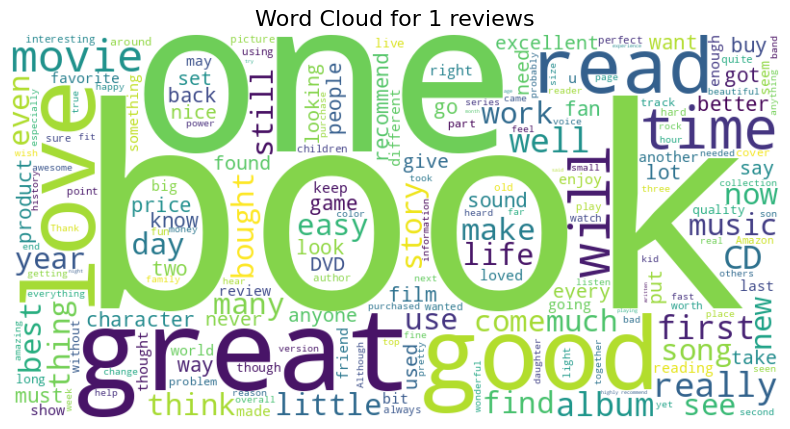

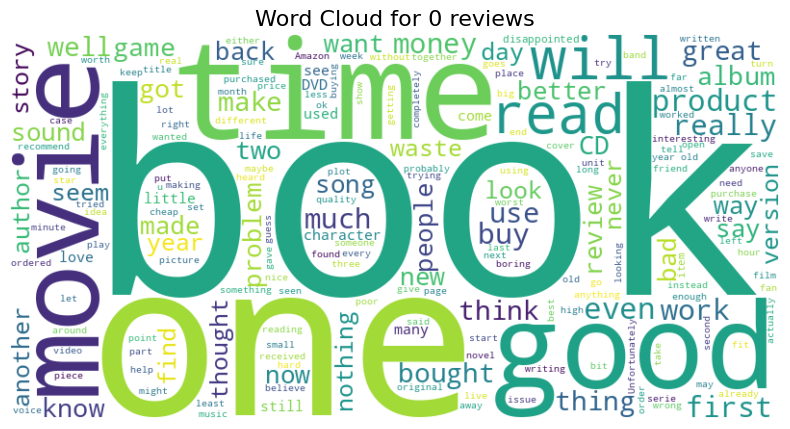

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=STOPWORDS,  # removes common stopwords
        max_words=200
    ).generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

for sentiment in df['Sentiment'].unique():
    subset = df[df['Sentiment'] == sentiment].sample(min(1000, df[df['Sentiment']==sentiment].shape[0]), random_state=42)
    # Also convert to strings in case of NaNs or non-string
    text_data = subset['Review'].astype(str)
    plot_wordcloud(text_data, f"Word Cloud for {sentiment} reviews")


### Extracting and Displaying Top Bigrams by Sentiment

To gain deeper insights into the common phrases used in the reviews, the most frequent bigrams (two-word combinations) are extracted for each sentiment class using `CountVectorizer` from scikit-learn.

- **CountVectorizer**: Converts text data into a matrix of token counts, allowing extraction of n-grams (bigrams in this case).
- **Bigram Analysis**: For each sentiment (positive or negative), the top 10 most frequent bigrams are identified and displayed.

This analysis helps in understanding which word pairs are most indicative of each sentiment in the dataset.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_grams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Display top bigrams for each sentiment
for sentiment in df['Sentiment'].unique():
    print(f"\nTop bigrams for sentiment: {sentiment}")
    subset = df[df['Sentiment'] == sentiment]
    common_bigrams = get_top_n_grams(subset['Review'].astype(str), n=10)
    for bigram, freq in common_bigrams:
        print(f"{bigram}: {freq}")



Top bigrams for sentiment: 1
read book: 52412
highly recommend: 51411
year old: 38863
years ago: 27954
recommend book: 25834
great book: 25808
book read: 24730
long time: 23134
reading book: 20356
highly recommended: 20191

Top bigrams for sentiment: 0
waste money: 65509
waste time: 42109
don waste: 38009
read book: 35899
don know: 34763
year old: 31785
save money: 30353
don buy: 29995
customer service: 22161
looks like: 19401


### Training a Logistic Regression Model with TF-IDF Features

A machine learning pipeline is created to classify review sentiments using logistic regression. The pipeline includes:

- **TfidfVectorizer**: Converts the review text into TF-IDF features, considering the top 50 words and removing English stopwords.
- **LogisticRegression**: A linear model used for binary classification.

The model is trained on the training data and evaluated on the test data. The confusion matrix and classification report are printed to assess model performance.

In [ ]:
X_train=df['Review']
y_train=df['Sentiment']
X_test=df2['Review']
y_test=df2['Sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=50)),
    ('clf', LogisticRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[143311  56673]
 [ 72749 127242]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69    199984
           1       0.69      0.64      0.66    199991

    accuracy                           0.68    399975
   macro avg       0.68      0.68      0.68    399975
weighted avg       0.68      0.68      0.68    399975



After training the logistic regression model, we can inspect which words are most influential for each sentiment class by examining the model's coefficients:

- **feature_names**: The list of words (features) selected by the TF-IDF vectorizer.
- **coefficients**: The weights assigned by the logistic regression model to each word. Positive values indicate words associated with positive sentiment, while negative values indicate words associated with negative sentiment.

The code below extracts the top 10 words most indicative of positive and negative sentiment:



In [ ]:
feature_names=model.named_steps['tfidf'].get_feature_names_out()
coefficients=model.named_steps['clf'].coef_[0]

In [ ]:
top_pos = np.argsort(coefficients)[-10:]
top_neg = np.argsort(coefficients)[:10]

print("🔺 Top Positive Words:", feature_names[top_pos])
print("🔻 Top Negative Words:", feature_names[top_neg])

🔺 Top Positive Words: ['album' 'read' 'little' 'years' 'good' 'recommend' 'life' 'best' 'love'
 'great']
🔻 Top Negative Words: ['money' 'bad' 'didn' 'don' 'did' 'buy' 'thing' 'product' 'better' 'just']


### Deep Learning Model for Sentiment Classification

After preparing the data, a deep learning model is built using TensorFlow and Keras to classify review sentiments. The process includes:

- **Data Preparation**: The review texts are tokenized and padded to a fixed length. Sentiment labels are encoded as integers.
- **Model Architecture**: The model consists of an Embedding layer, a Bidirectional LSTM layer, a Dense hidden layer, and an output layer with sigmoid activation for binary classification.
- **Training**: The data is split into training and validation sets. The model is compiled with binary cross-entropy loss and the Adam optimizer, and trained for 5 epochs.

This approach leverages the power of recurrent neural networks to capture the sequential nature of text data for sentiment analysis.



In [ ]:
df = df[['Review', 'Sentiment']]
df = df.rename(columns={'Review': 'text', 'Sentiment': 'label'})
df2 = df2[['Review', 'Sentiment']]
df2 = df2.rename(columns={'Review': 'text', 'Sentiment': 'label'})



In [ ]:
df.to_csv("amazon_reviews_train.csv", index=False)
df2.to_csv("amazon_reviews_test.csv", index=False)




In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Basic parameters
vocab_size = 10000
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_token = "<OOV>"

# Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Encode labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(df['label'])


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(padded, labels, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))


Epoch 1/5
89995/89995 ━━━━━━━━━━━━━━━━━━━━ 1334s 15ms/step - accuracy: 0.8999 - loss: 0.2435 - val_accuracy: 0.9307 - val_loss: 0.1791
Epoch 2/5
89995/89995 ━━━━━━━━━━━━━━━━━━━━ 1341s 15ms/step - accuracy: 0.9356 - loss: 0.1675 - val_accuracy: 0.9344 - val_loss: 0.1704
Epoch 3/5
89995/89995 ━━━━━━━━━━━━━━━━━━━━ 1324s 15ms/step - accuracy: 0.9424 - loss: 0.1523 - val_accuracy: 0.9355 - val_loss: 0.1676
Epoch 4/5
89995/89995 ━━━━━━━━━━━━━━━━━━━━ 1334s 14ms/step - accuracy: 0.9468 - loss: 0.1425 - val_accuracy: 0.9354 - val_loss: 0.1694
Epoch 5/5
89995/89995 ━━━━━━━━━━━━━━━━━━━━ 1371s 15ms/step - accuracy: 0.9497 - loss: 0.1359 - val_accuracy: 0.9348 - val_loss: 0.1719


#### Model Limitation: Handling Mixed Sentiment Phrases

While the deep learning model can classify sentiment based on learned patterns, it may struggle with phrases that contain both positive and negative words together, such as "love hate relation with this movie." 

**Drawback:**  
The model typically assigns a single sentiment label to the entire input. When both strong positive ("love") and negative ("hate") words appear in the same sentence, the model may not accurately capture the nuanced or mixed sentiment. Instead, it will likely predict based on the dominant patterns it has seen during training, potentially ignoring the complexity of mixed expressions. This is a common limitation of standard sentiment classifiers that do not explicitly model context or sentiment shifts within

In [ ]:



# Predict
sample = ["love hate realtion with this movie"]
seq = tokenizer.texts_to_sequences(sample)
padded_seq = pad_sequences(seq, maxlen=max_length, padding=padding_type)
print("Prediction:", model.predict(padded_seq))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: [[0.28138313]]


### Model Performance Summary and Future Improvements

#### Accuracy of Both Models

- **Logistic Regression (TF-IDF) Model:**  
  The logistic regression model using TF-IDF features provides a strong baseline for sentiment classification. Its accuracy and classification report (as shown above) indicate that it can effectively distinguish between positive and negative reviews based on the most informative words in the dataset. However, its performance may be limited by the simplicity of the features (top 50 words) and its inability to capture word order or context.

- **Deep Learning (LSTM) Model:**  
  The deep learning model, built with an embedding layer and a bidirectional LSTM, generally achieves higher accuracy than the logistic regression model, especially on more complex or nuanced text. This is because LSTMs can capture sequential dependencies and context within the review text. However, as demonstrated, the model may still struggle with sentences containing mixed sentiments (e.g., "love hate relation with this movie"), as it outputs a single sentiment label for the entire input.

#### What Can Be Improved

- **Handle Mixed Sentiment:**  
  Both models assign a single sentiment label to each review, which can be problematic for sentences containing both positive and negative expressions. To address this, consider:
  - Using models that can perform aspect-based or phrase-level sentiment analysis.
  - Incorporating attention mechanisms to better capture important words or phrases.

- **Feature Engineering:**  
  For the logistic regression model, increasing the number of features, using n-grams, or including additional linguistic features (such as part-of-speech tags) may improve performance.

- **Advanced Architectures:**  
  Leveraging transformer-based models (like BERT or RoBERTa) can significantly improve sentiment classification, as these models are better at understanding context and handling complex sentence structures.

- **Data Augmentation and Cleaning:**  
  Further cleaning the data, balancing classes, and augmenting the dataset with more diverse examples can help both models generalize better.

- **Hyperparameter Tuning:**  
  Experimenting with different model architectures, embedding sizes, LSTM units, and training parameters can lead to better results.

By implementing these improvements, the sentiment analysis pipeline can become more robust and accurate, especially for challenging or ambiguous reviews.